In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

# Q1: What is the total number of goals scored in the entire dataset?




In [8]:
df['Goals'].sum()

7795

# Q2: Which player has scored the most goals as a substitution

In [11]:
Players = df.groupby('Player Names')
Players.sum()

,Country,League,Club,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
Player Names,,,,,,,,,,,,,,
Abdou Harroui,Netherlands,Eredivisie,(SPR),10,0,834,4,1.93,0.22,24,13,2.73,1.48,2019
Adrien Hunou,France,France Ligue 17,(REN),13,10,1325,8,7.25,0.52,28,15,2.01,1.08,2019
Adrien Thomasson,France,France Ligue 20,(STR),24,1,2168,7,5.25,0.23,50,18,2.19,0.79,2019
Aduriz,Spain,La Liga,0,27,5,2480,16,15.92,0.61,85,45,3.26,1.72,2016
Alassane Plea,GermanyGermany,BundesligaBundesliga,(BMG)(BMG),53,8,4865,22,22.90,0.90,160,76,6.27,2.97,4037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yeferson Soteldo,Brazil,Campeonato Brasileiro SÃ©rie A,(SAN),31,1,2883,9,8.80,0.29,68,26,2.24,0.86,2019
Youssef En-Nesyri,Spain,La Liga,(SEV),5,4,465,4,3.33,0.68,14,4,2.86,0.82,2020
Yussuf Poulsen,Germany,Bundesliga,(RBL),27,4,2556,15,10.76,0.40,65,27,2.42,1.00,2018


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [19]:
df_player = df.groupby('Player Names')
df_tops = df_player['Goals'].agg([np.sum])

In [24]:
df_top_players = df_tops.sort_values(by='sum', ascending=False)
df_top_players.head(5)

,sum
Player Names,
Lionel Messi,135
Cristiano Ronaldo,128
Robert Lewandowski,127
Ciro Immobile,107
Luis Suarez,95


# Q4: What are the top 10 countries with the most number of players in the dataset?

# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [66]:
df_player = df.groupby('Player Names')
df_tops = df_player['Goals'].agg([np.sum])
df_top_players = df_tops.sort_values(by='sum', ascending=False)
x = df_top_players.head(5)

In [68]:
x.sort_values(by = 'sum', ascending = True)

,sum
Player Names,
Luis Suarez,95
Ciro Immobile,107
Robert Lewandowski,127
Cristiano Ronaldo,128
Lionel Messi,135


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [83]:
df_player = df.groupby(['Player Names','Year'])

In [86]:
df_player = df_player['Goals'].agg([np.sum])

In [90]:
ronaldo_data = df[df['Player Names'] == 'Cristiano Ronaldo']

<BarContainer object of 5 artists>

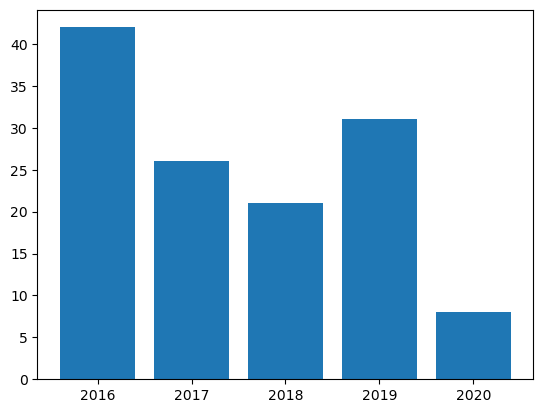

In [92]:
plt.bar(ronaldo_data['Year'], ronaldo_data['Goals'])

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [93]:
ronaldo_data = df[df['Player Names'] == 'Cristiano Ronaldo']

In [102]:
ronaldo_Goals = ronaldo_data['Goals'].agg([np.sum])

In [98]:
messi_data = df[df['Player Names'] =='Lionel Messi']

In [99]:
messi_Goals = messi_data['Goals'].agg([np.sum])

In [100]:
messi_Goals

sum    135
Name: Goals, dtype: int64

<BarContainer object of 660 artists>

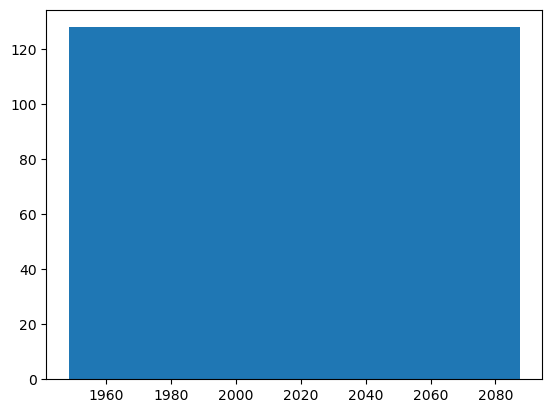

In [106]:
plt.bar(df['Year'],ronaldo_Goals, messi_Goals)

In [103]:
diff = ronaldo_Goals-messi_Goals

In [104]:
diff

sum   -7
Name: Goals, dtype: int64

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

In [110]:
df_country = df['Country'].value_counts()

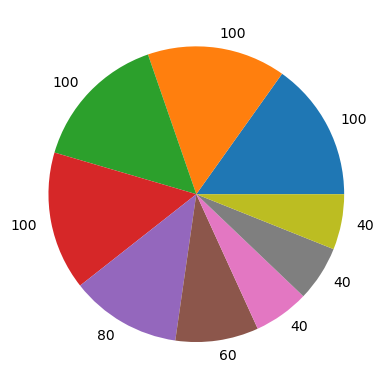

In [119]:
plt.pie(df_country,labels = df_country)
plt.show()

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

In [123]:
x = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

ValueError: could not convert string to float: 'Spain'

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [126]:
df_year = df[df['Year'] == 2020]

In [131]:
x = df_year.groupby('Player Names')

In [139]:
a = x['OnTarget'].agg([np.median])

In [140]:
a

,median
Player Names,
Alejandro Gomez,11.0
Alerrandro,11.0
Alex Pozuelo,25.0
Amine Gouiri,10.0
Andre Hahn,6.0
...,...
Wilfried Zaha,7.0
Wissam Ben,8.0
Wout Weghorst,14.0


In [141]:
a.sort_values(by='median',ascending=False)

,median
Player Names,
Steven Berghuis,44.0
Cyriel Dessers,43.0
Bryan Linssen,39.0
Oussama Idrissi,34.0
Diego Rossi,34.0
...,...
Jhon Cordoba,5.0
Portu,4.0
Esteban Burgos,4.0


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [143]:
df_player = df[df['Matches_Played']>30]

In [156]:
x = df_player.groupby('Player Names')

In [162]:
a= x['Goals'].agg([np.sum])
b =x['Mins'].agg([np.sum])

In [164]:
c = a['sum']/b['sum']

In [167]:
c

Player Names
Alejandro Gomez       0.004928
Alejandro Pozuelo     0.004510
Alexis Sanchez        0.007090
Andone                0.004021
Andre                 0.005459
                        ...   
Wissam Ben Yedder     0.006050
Wout Weghorst         0.005554
Yago Pikachu          0.003133
Yeferson Soteldo      0.003122
Zlatan Ibrahimovic    0.010340
Name: sum, Length: 130, dtype: float64

In [166]:
c.agg([np.mean])

mean    0.005159
Name: sum, dtype: float64

# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [74]:
df_player = df.groupby('Player Names')
df_shot = df_player['Shots'].agg([np.sum])
df_a = df_player['OnTarget'].agg([np.sum])

In [75]:
diff = df_shot-df_a

In [79]:
max  = diff.sort_values(by='sum', ascending = False)
max.head(1)

,sum
Player Names,
Cristiano Ronaldo,455


In [80]:
min  = diff.sort_values(by='sum', ascending = True)
min.head(1)

,sum
Player Names,
Esteban Burgos,1


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [177]:
df_player = df[df['Matches_Played']>35]

In [178]:
Country_counts = df_player['Country'].value_counts()

In [179]:
Country_counts

Country
England    11
Spain       9
Italy       9
France      4
Brazil      1
Name: count, dtype: int64

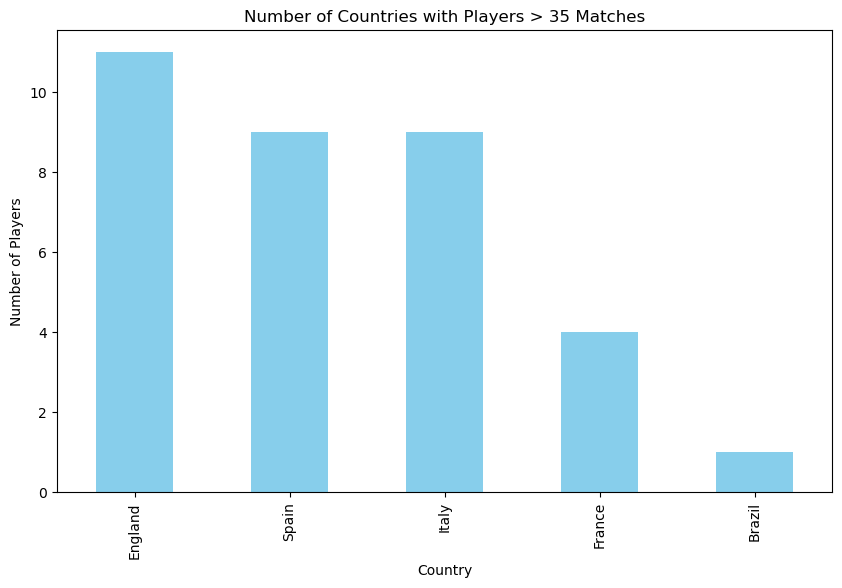

In [180]:
plt.figure(figsize=(10, 6))
Country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Countries with Players > 35 Matches')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

In [198]:
groups = df.groupby('Player Names')['Goals'].sum()


In [202]:
groups

Player Names
Abdou Harroui           4
Adrien Hunou            8
Adrien Thomasson        7
Aduriz                 16
Alassane Plea          22
                       ..
Yeferson Soteldo        9
Youssef   En-Nesyri     4
Yussuf Poulsen         15
Zlatan Ibrahimovic     58
Ãngel Di Maria         8
Name: Goals, Length: 444, dtype: int64

In [199]:
x = groups.nlargest(5)

In [200]:
y = df[df['Player Names'].isin(x.index)]

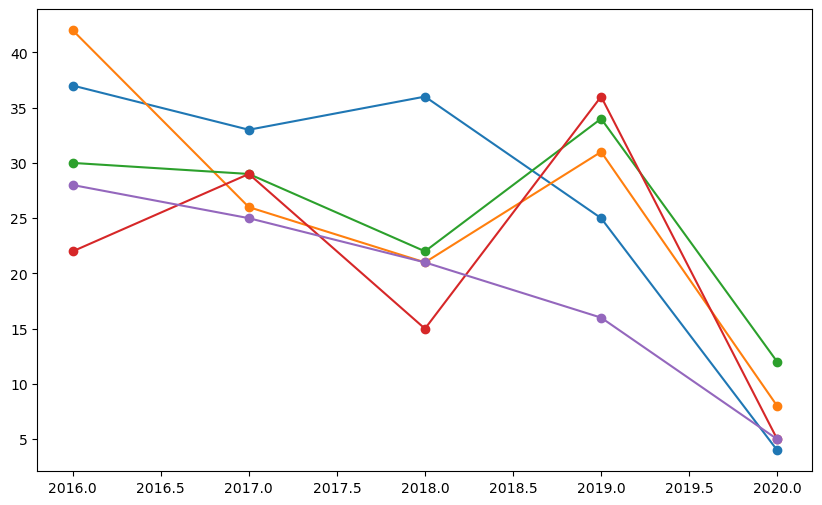

In [201]:
plt.figure(figsize=(10, 6))
for player in x.index:
    a = y[y['Player Names'] == player]
    plt.plot(a['Year'], a['Goals'], label=player, marker='o')
plt.show()